# Session 9: Fast Fourier Transform

Date: 11/27/2017, Monday

In [111]:
format compact

## Generate input signal

In [190]:
t = -5:0.1:4.9;
f1 = 0.5;
b1 = 0.3; % constant bias
y1 = b1 + 0.7*cos(f1*2*pi*t);

In [191]:
N = length(t)

N =
   100


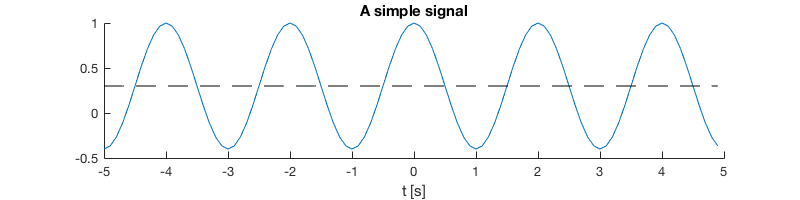

In [208]:
%plot -s 800,200
hold on
plot(t, y1) 
plot(t, b1*ones(N,1), '--k')
title('A simple signal')
xlabel('t [s]')

## Perform fourier transform

In [193]:
F1 = fft(y1);
length(F1)

ans =
   100


### Full spectrum

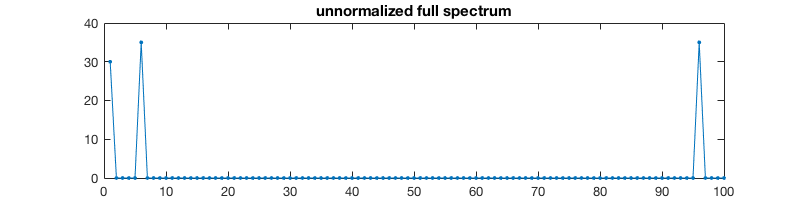

In [200]:
%plot -s 800,200
plot(abs(F1),'- .')
title('unnormalized full spectrum')

In [195]:
F1(1)/N % equal to constant bias term

ans =
    0.3000


In [197]:
F1(2+4)/N, F1(end-4)/N

ans =
  -0.3500 - 0.0000i
ans =
  -0.3500 + 0.0000i


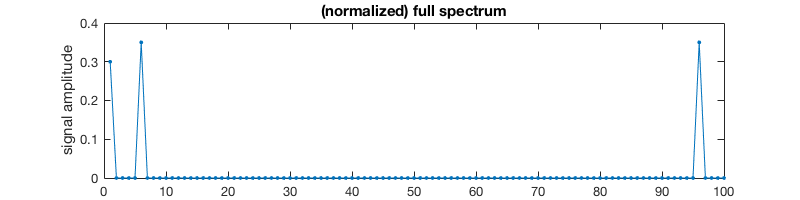

In [207]:
%plot -s 800,200
plot(abs(F1)/N,'- .')
title('(normalized) full spectrum')
ylabel('signal amplitude')

### Half-sided spectrum

In [184]:
M = N/2 % need to cast to integer if N is an odd number

M =
    50


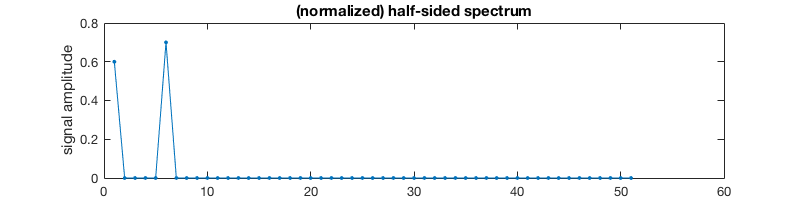

In [213]:
%plot -s 800,200
plot(abs(F1(1:M+1))/N*2, '- .')
title('(normalized) half-sided spectrum')
ylabel('signal amplitude')

## Understanding units!

In [210]:
dt = t(2)-t(1) % [s]

dt =
    0.1000


In [211]:
f_max = 1/dt % [1/s] = [Hz]

f_max =
   10.0000


In [108]:
df = f_max/N % [Hz]

df =
    0.1000


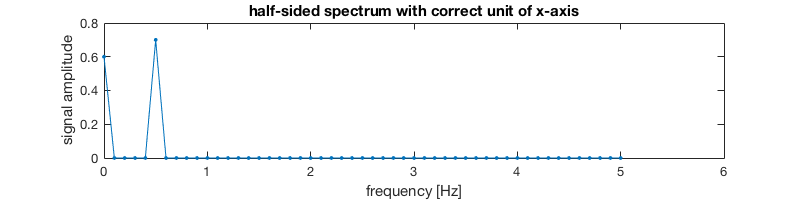

In [286]:
%plot -s 800,200
plot(df*(0:M), abs(F1(1:M+1))/N*2,'- .')
title('half-sided spectrum with correct unit of x-axis')
ylabel('signal amplitude')
xlabel('frequency [Hz]')

The peak is at 0.5 Hz, consistent with our original signal which has a period of 2 s, since 0.5 Hz = 1/(2s).

## Perform reverse transform

In [119]:
norm(ifft(F1) - y1)

ans =
   1.7759e-15


## Mix two signals

In [243]:
k2 = 5;
y2 = 0.2*sin(k2*pi*t);
y = y1 + y2;

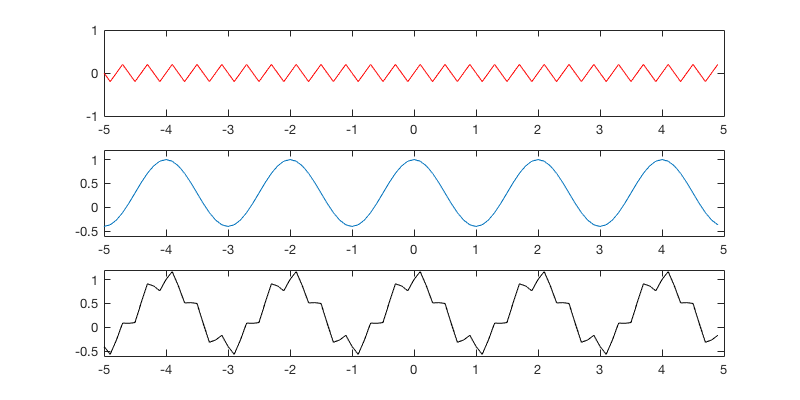

In [244]:
%plot -s 800,400
subplot(311);plot(t, y2, 'r');ylim([-1,1])
subplot(312);plot(t, y1);ylim([-0.6,1.2])
subplot(313);plot(t, y, 'k');ylim([-0.6,1.2])

In [245]:
F = fft(y);

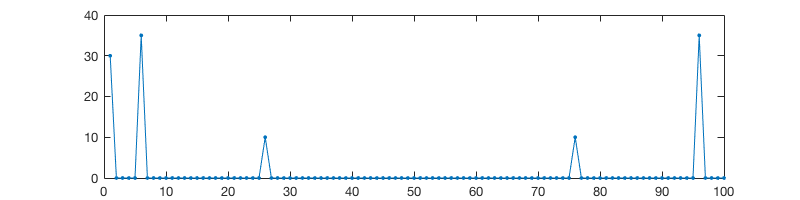

In [246]:
%plot -s 800,200
plot(abs(F), '- .')

In [279]:
F(2+24)/N, F(end-24)/N

ans =
  -0.0000 + 0.1000i
ans =
  -0.0000 - 0.1000i


## Filter out high-frequency noise

In [280]:
F_filtered = F;
F_filtered(26) = 0;
F_filtered(76) = 0;

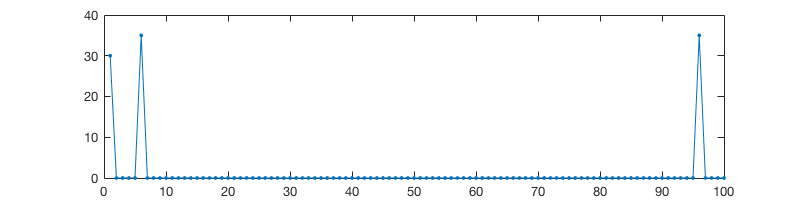

In [282]:
plot(abs(F_filtered), '- .')

In [260]:
y_filtered = ifft(F_filtered);

In [261]:
norm(imag(y_filtered))

ans =
     0


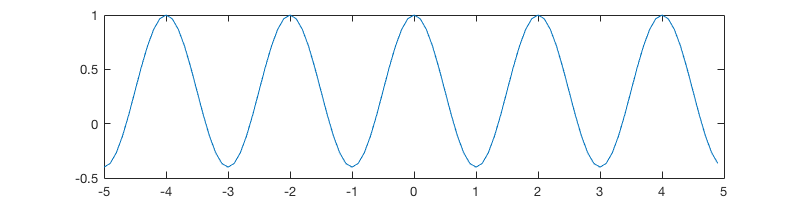

In [262]:
%plot -s 800,200
plot(t, y_filtered)

In [263]:
norm(y_filtered - y1)

ans =
   5.6847e-15


## Filter has to be symmetric

In [271]:
F_wrong_filtered = F;
F_wrong_filtered(76) = 0;

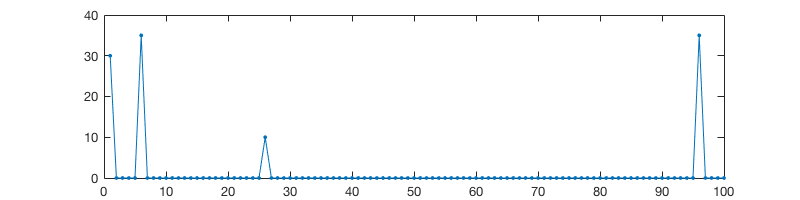

In [272]:
plot(abs(F_wrong_filtered), '- .')

In [273]:
y_wrong_filtered = ifft(F_wrong_filtered);

In [274]:
y_wrong_filtered(1:4)'

ans =
  -0.4000 - 0.1000i
  -0.4657 + 0.0000i
  -0.2663 + 0.1000i
  -0.0114 - 0.0000i


In [275]:
norm(imag(y_wrong_filtered))

ans =
    0.7071


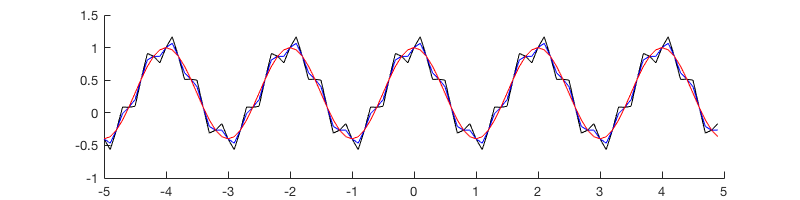

In [278]:
hold on
plot(t, y, 'k')
plot(t, real(y_wrong_filtered), 'b')
plot(t, y1, 'r')